In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:

data=pd.read_csv('Salary_data.csv')
data


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


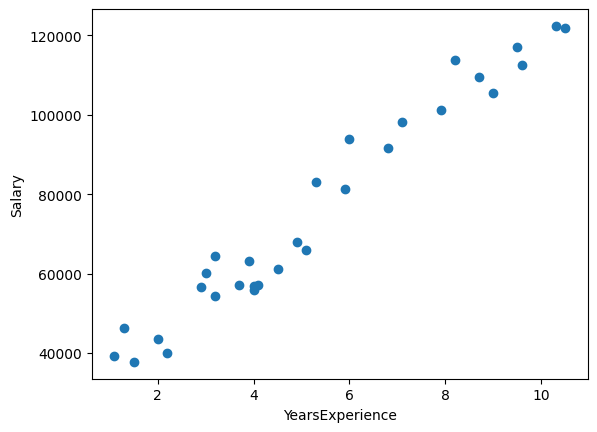

In [ ]:

X=data['YearsExperience']
y=data['Salary']

plt.scatter(X,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()



In [ ]:
class OLS:
    def __init__(self):
        self.coeff=[0,0]
    
    def train(self, X, y):
        diff_x=X-np.mean(X)
        diff_y=y-np.mean(y)
        self.coeff[1] = sum(diff_x*diff_y)/sum(diff_x*diff_x)
        self.coeff[0] = np.mean(y)-self.coeff[1]*np.mean(X)
        
    def predict(self,X):
        y=self.coeff[0]+self.coeff[1]*X
        return y
    
    def RSS(self,y,y_pred):
        error=y-y_pred
        rss=sum(error*error)
        return rss
    
    def TSS(self,y):
        error=y-y.mean()
        tss=sum(error*error)
        return tss
    
    def R2(self,rss,tss):
        r2= 1-(rss/tss)
        return r2
    



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

model=OLS()
model.train(X_train,y_train)

print('Value of coefficient b:', model.coeff[0])

print('Value of coefficient m: ',model.coeff[1])


Value of coefficient b: 26777.39134119761
Value of coefficient m:  9360.261286193658


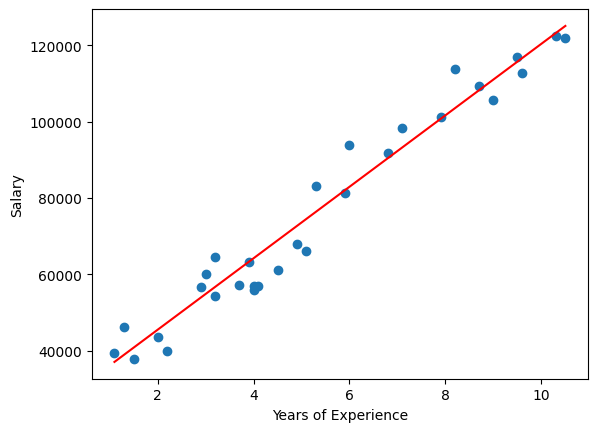

R2 Score:  0.9740993407213511
MSE:  23370078.800832942


In [ ]:


plt.scatter(X, y)
plt.plot(X, model.coeff[0] + (model.coeff[1] * X), 'r-')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

y_pred=model.predict(X_test)
y_pred

#calculating R2 Score for testing data

rss=model.RSS(y_test,y_pred)
tss=model.TSS(y_test)
r2=model.R2(rss,tss)
print('R2 Score: ', r2)

#calculating MSE for testing data

mse=rss/len(y_test)
print('MSE: ',mse)
